<a href="https://colab.research.google.com/github/koradaBhavana/Blog_Template/blob/main/online_payment_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("/content/sample_data/PS_20174392719_1491204439457_log.csv.zip")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 3
Float variables: 5


In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


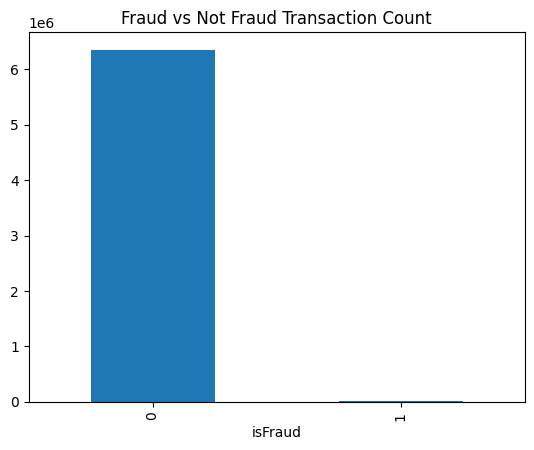

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


<Figure size 640x480 with 0 Axes>

In [ ]:
data['isFraud'].value_counts().plot(kind='bar')
plt.title('Fraud vs Not Fraud Transaction Count')
plt.show()
fraud_ratio = data['isFraud'].value_counts(normalize=True) * 100
print(fraud_ratio)
plt.savefig('Fraud.png')

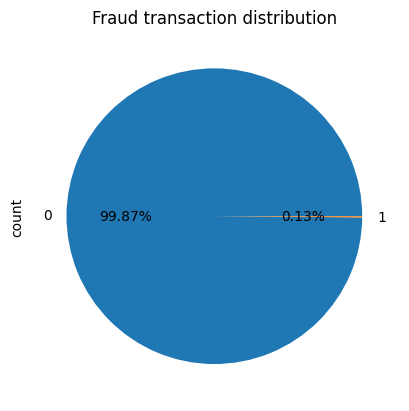

In [ ]:
plt.title('Fraud transaction distribution')
data['isFraud'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.savefig('Fraud_per.png')

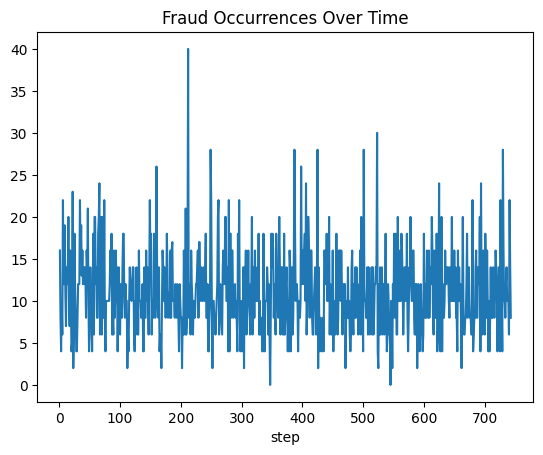

In [ ]:
plt.title('Fraud Occurrences Over Time')
data.groupby('step')['isFraud'].sum().plot(kind='line')
plt.savefig('Fraud_hour.png')

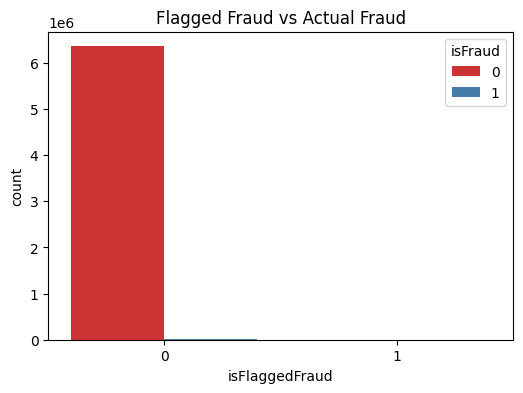

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='isFlaggedFraud', hue='isFraud', data=data, palette='Set1')
plt.title('Flagged Fraud vs Actual Fraud')
plt.show()
plt.savefig('Fraud_vs_ActualFraud.png')

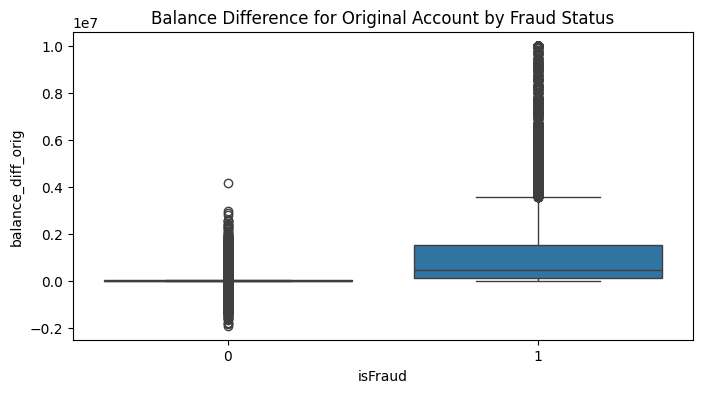

<Figure size 640x480 with 0 Axes>

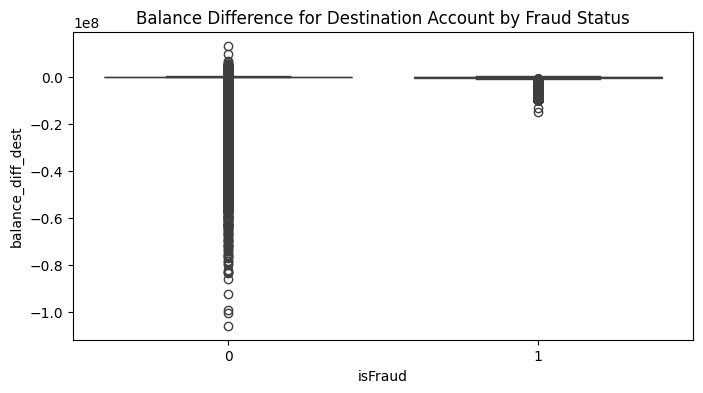

<Figure size 640x480 with 0 Axes>

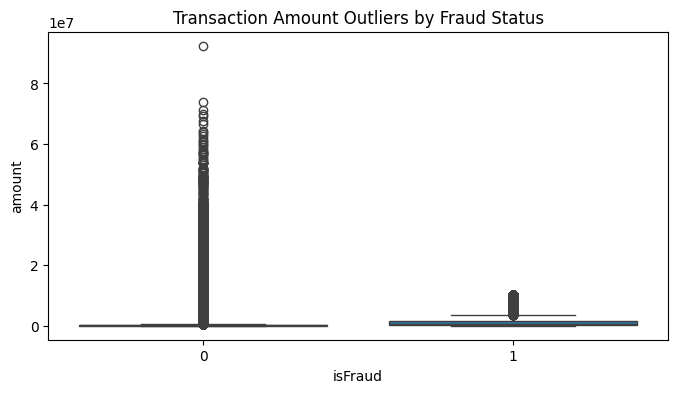

<Figure size 640x480 with 0 Axes>

In [ ]:
data['balance_diff_orig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balance_diff_dest'] = data['oldbalanceDest'] - data['newbalanceDest']
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='balance_diff_orig', data=data)
plt.title('Balance Difference for Original Account by Fraud Status')
plt.show()
plt.savefig('Balance Difference_by_OA.png')
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='balance_diff_dest', data=data)
plt.title('Balance Difference for Destination Account by Fraud Status')
plt.show()
plt.savefig('Balance Difference_by_DA.png')
plt.figure(figsize=(8,4))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount Outliers by Fraud Status')
plt.show()
plt.savefig('TransactionAmount_by_FS.png')

In [ ]:
desc_stats = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()
print(desc_stats)

             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  6.362620e+06   6.362620e+06    6.362620e+06    6.362620e+06   
mean   1.798619e+05   8.338831e+05    8.551137e+05    1.100702e+06   
std    6.038582e+05   2.888243e+06    2.924049e+06    3.399180e+06   
min    0.000000e+00   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.338957e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.487194e+04   1.420800e+04    0.000000e+00    1.327057e+05   
75%    2.087215e+05   1.073152e+05    1.442584e+05    9.430367e+05   
max    9.244552e+07   5.958504e+07    4.958504e+07    3.560159e+08   

       newbalanceDest  
count    6.362620e+06  
mean     1.224996e+06  
std      3.674129e+06  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.146614e+05  
75%      1.111909e+06  
max      3.561793e+08  


In [ ]:
data.type.value_counts().sort_values()

,count
type,
DEBIT,41432
TRANSFER,532909
CASH_IN,1399284
PAYMENT,2151495
CASH_OUT,2237500


In [ ]:
import plotly.express as px
type_counts = data['type'].value_counts().sort_values()
fig2 = px.pie(
    data_frame=type_counts,values=type_counts.values,
    names=type_counts.index,title='Distribution of Transaction Type',
    color=type_counts.index,color_discrete_sequence=px.colors.sequential.Viridis_r,height=500)
fig2.show()
plt.savefig('value counts for transaction types.png')

<Figure size 640x480 with 0 Axes>

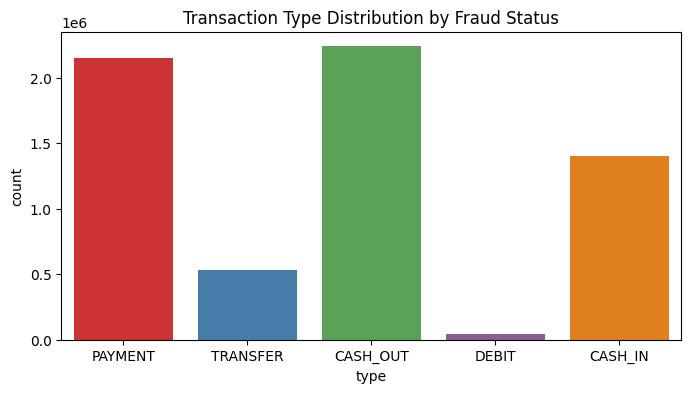

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='type', hue='type', data=data, palette='Set1', legend=False)
plt.title('Transaction Type Distribution by Fraud Status')
plt.show()
plt.savefig('Transaction Type Distribution.png')

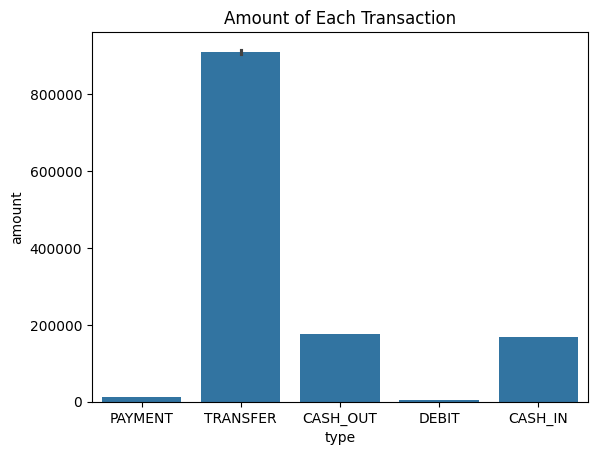

In [ ]:
plt.title('Amount of Each Transaction')
sns.barplot(x='type', y='amount', data=data)
plt.savefig('AmountbyType.png')

In [ ]:
print(data[data['isFraud'] == 1]['nameOrig'].value_counts().head())
print(data[data['isFraud'] == 1]['nameDest'].value_counts().head())

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
Name: count, dtype: int64
nameDest
C1981613973    2
C410033330     2
C1366192319    2
C1655359478    2
C803116137     2
Name: count, dtype: int64


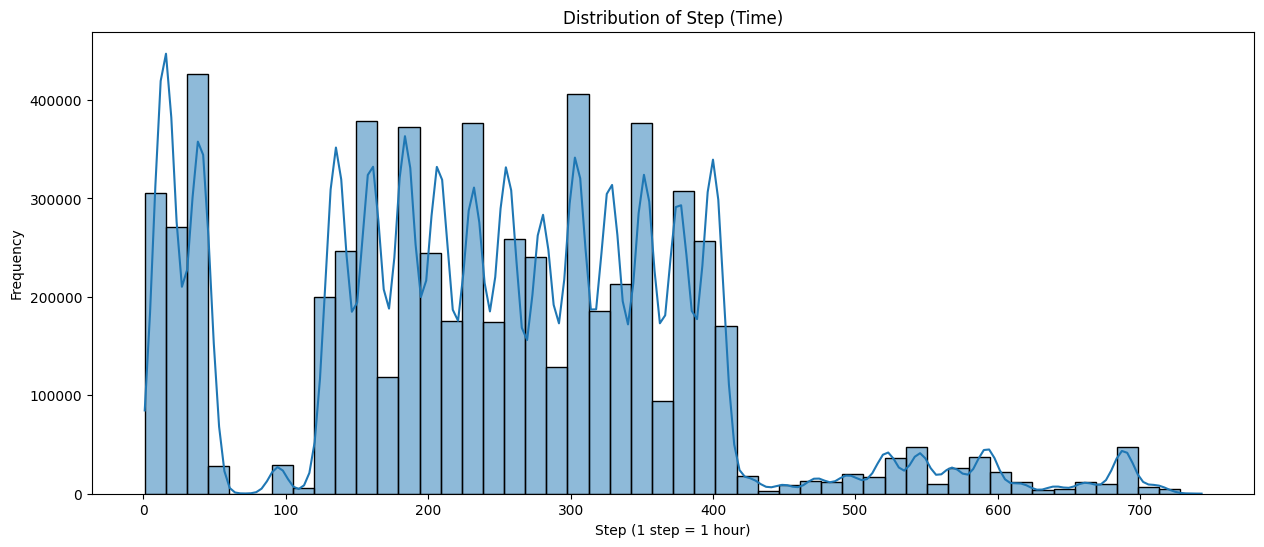

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50, kde=True)
plt.title('Distribution of Step (Time)')
plt.xlabel('Step (1 step = 1 hour)')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Distribution of Step.png')


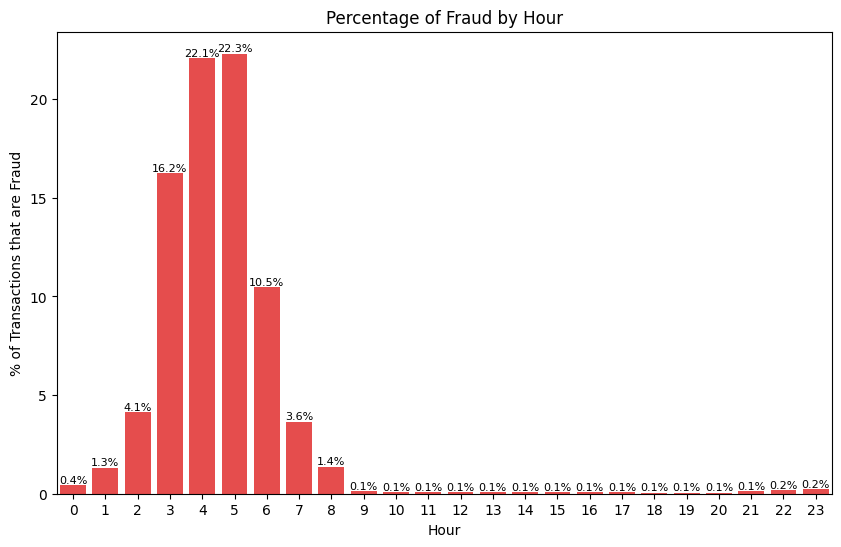

In [ ]:
data['hour'] = data['step'] % 24
fraud_percentage_by_hour = (data[data['isFraud'] == 1]['hour'].value_counts() / data['hour'].value_counts()) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_percentage_by_hour.index, y=fraud_percentage_by_hour.values, color='red', alpha=0.8)
plt.xlabel('Hour')
plt.ylabel('% of Transactions that are Fraud')
plt.title('Percentage of Fraud by Hour')
for index, value in enumerate(fraud_percentage_by_hour):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)
plt.savefig('FruadByHour.png')

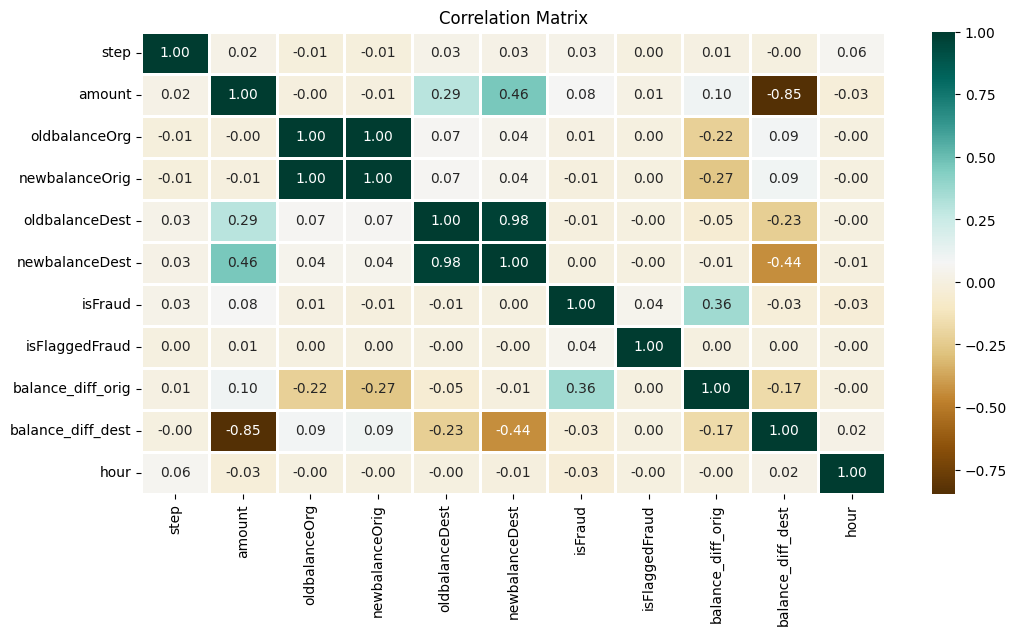

<Figure size 640x480 with 0 Axes>

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)
plt.title('Correlation Matrix')
plt.show()
plt.savefig('correlation matrix.png')


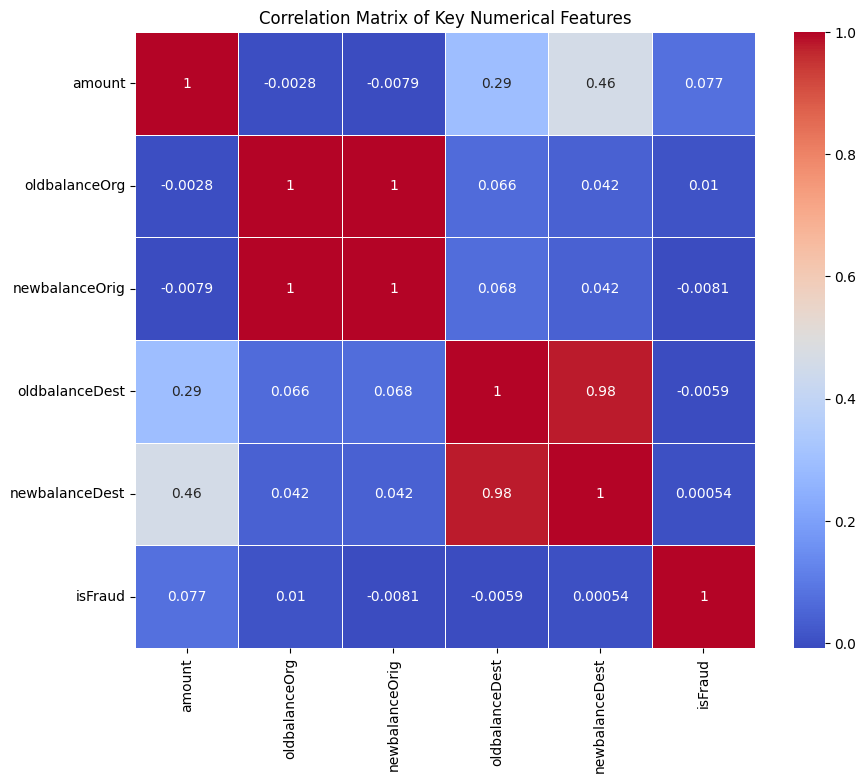

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,8))
corr_matrix = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()
plt.savefig('correlation matrix2.png')